In case of Elon Musk, we had just a few duplicates (See dataset_difference_test.ipynb).

In [1]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


In [2]:
# export the cleaned tweets to csv files
df = pd.read_csv("Clean\clean_RIPTwitter.csv")

Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [3]:
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df['Subjectivity'] = df.Tweets.apply(subj)
df['Polarity'] = df.Tweets.apply(pol)

df.head(5)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,OH MY GOD IT'S 52!,0.000000,0.000000
1,1,"Done, \r\n\r\nTRUDYLH20 ~",0.000000,0.000000
2,2,"Absolutely, \r\n\r\nTrudy Daves",0.900000,0.200000
3,3,"Hey, The number is 35!",0.000000,0.000000
4,4,"Of more than 140,000 Twitter users who announc...",0.222222,0.177778


Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

In [4]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)
df.head()

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,OH MY GOD IT'S 52!,0.000000,0.000000,Neutral
1,1,"Done, \r\n\r\nTRUDYLH20 ~",0.000000,0.000000,Neutral
2,2,"Absolutely, \r\n\r\nTrudy Daves",0.900000,0.200000,Positive
3,3,"Hey, The number is 35!",0.000000,0.000000,Neutral
4,4,"Of more than 140,000 Twitter users who announc...",0.222222,0.177778,Positive


The ratio of the sentiment is shown by using scatter plot, pie plot, bar plot

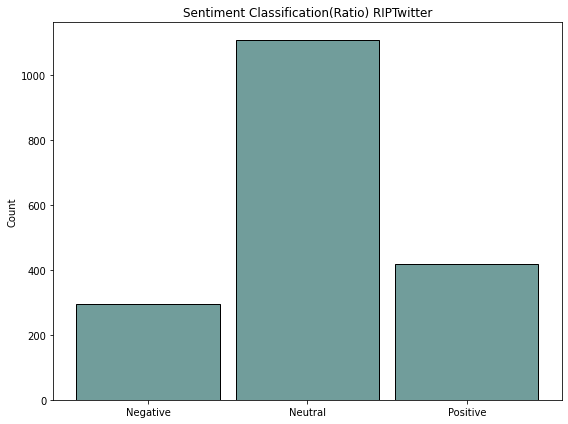

In [5]:
plt.figure(figsize = (8,6))
sb.histplot(df.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) RIPTwitter')
plt.tight_layout()

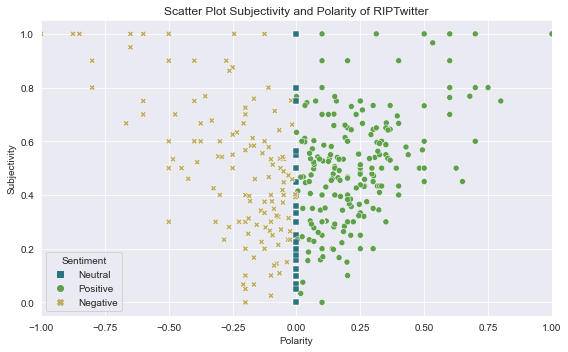

In [6]:
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of RIPTwitter')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

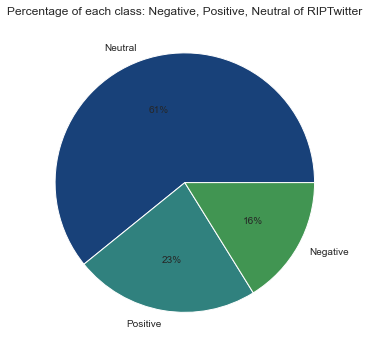

In [9]:
df_sentiment_before = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total'] = df.Sentiment.value_counts()
df_sentiment_before
plt.figure(figsize = (10, 5))
data = df['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Neutral','Positive', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of RIPTwitter')
plt.tight_layout()
